In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import random

%matplotlib inline

warnings.filterwarnings('ignore')

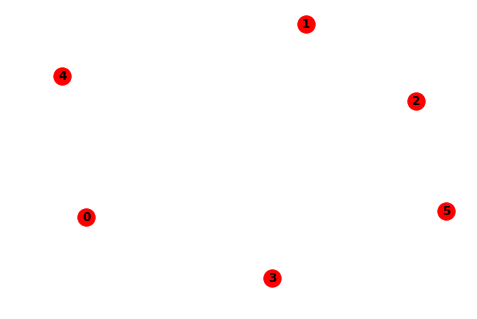

In [2]:
G = nx.gnm_random_graph(random.randint(5, 10), 0)

nx.draw(G, with_labels=True, font_weight='bold')

In [3]:
def make_rand_component(G, fn, trials, figsize=(12, 8)):
    n = G.number_of_nodes()
    results = []
    avg = 0.0
    
    for i in range(trials):
        gc = G.copy()
        steps = 0
        edges = []
        
        while not fn(gc):
            e = (random.randint(0, n), random.randint(0, n))
            while e in edges:
                e = (random.randint(0, n), random.randint(0, n))
            edges.append(e)
            gc.add_edge(*e)
            steps += 1
        avg += steps
        results.append(steps)
    
    print('Average steps %.2f for %d trials' % (avg / trials, trials))
    
    plt.figure(figsize=figsize)
    plt.plot(range(trials), results, 'o')
    plt.xlabel('Trials')
    plt.ylabel('Steps')
    plt.show()

Average steps 9.37 for 100 trials


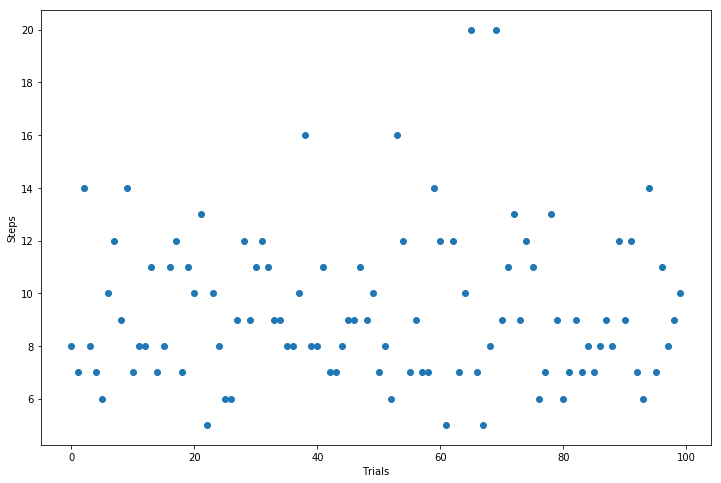

Average steps 9.29 for 1000 trials


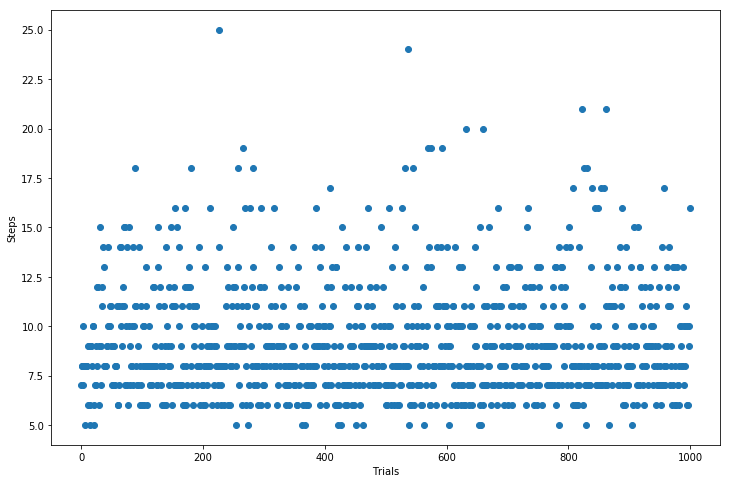

Average steps 9.39 for 10000 trials


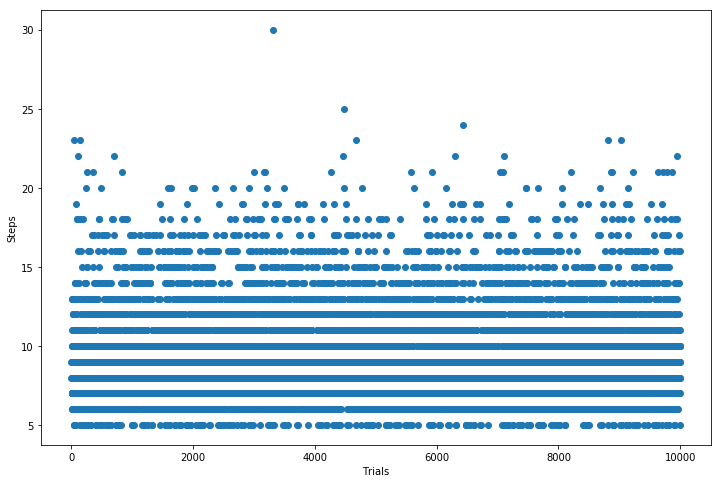

In [5]:
cond = lambda x : nx.number_connected_components(x) == 1

make_rand_component(G, cond, 100)
make_rand_component(G, cond, 1000)
make_rand_component(G, cond, 10000)